# Intention: cuantas proteinas de LLPS estan asociadas a cada enfermedad?

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2,venn2_unweighted, venn3, venn3_circles

In [2]:
# Tables from DisPhase
cross_reference= pd.read_csv('../db_tables/cross_reference.tsv', sep= '\t')
disease_has_synonyms = pd.read_csv('../db_tables/disease_has_synonyms.tsv', sep= '\t')

In [3]:
# MeSH data with ui identifiers
# Downloaded from https://nlmpubs.nlm.nih.gov/projects/mesh/MESH_FILES/
# and preprocessed in scripts/mesh/01_clean_mesh.pl
mesh_df = pd.read_csv('../raw_data/d2021_processed.tsv', sep='\t').drop(columns= 'cross_reference') # these are not cross ref
mesh_df

,ui,mesh_name,tree
0,D000001,Calcimycin,D03.633.100.221.173
1,D000002,Temefos,"D02.705.400.625.800,D02.705.539.345.800,D02.88..."
2,D000003,Abattoirs,"J01.576.423.200.700.100,J03.540.020"
3,D000004,Abbreviations as Topic,L01.559.598.400.556.131
4,D000005,Abdomen,A01.923.047
...,...,...,...
29911,D066309,Public Service Announcement,V02.736
29912,D066310,Digital Divide,L01.143.230.500
29913,D066328,Ventral Striatum,A08.186.211.200.885.287.249.487.775
29914,D066329,Protein Aggregates,D05.875


In [4]:
mesh_df.mesh_name.sample(10)

19048                    Lichen Planus, Oral
23375                          Pseudowintera
18858    Skin and Connective Tissue Diseases
26397                     Lipoproteins, HDL2
9475                Injections, Subcutaneous
23490                    Neutron Diffraction
4674                        Carboxylic Acids
10251                                  Liver
28258                        Fraser Syndrome
10061           Leishmaniasis, Mucocutaneous
Name: mesh_name, dtype: object

In [5]:
# Diseases from DisPhase with cross references
disease_has_synonyms = disease_has_synonyms.merge(cross_reference).drop(columns='id_cross')

## venn diagram

In [93]:
disease_has_synonyms.cross_name.value_counts()

SNOMEDCT_US        15051
MSH                11436
OMIM               10893
NCI                 6991
CHV                 5346
                   ...  
PNDS                   1
MTHICPC2ICD10AE        1
NCI_GAIA               1
NCI_CDISC-GLOSS        1
HL7V2.5                1
Name: cross_name, Length: 84, dtype: int64

In [112]:
cui_mesh = set(disease_has_synonyms[disease_has_synonyms.cross_name == "MSH"].cui)
cui_snomed = set(disease_has_synonyms[disease_has_synonyms.cross_name == "SNOMEDCT_US"].cui)
cui_omim = set(disease_has_synonyms[disease_has_synonyms.cross_name == "OMIM"].cui)
cui_nci = set(disease_has_synonyms[disease_has_synonyms.cross_name == "NCI"].cui)
cui_chv = set(disease_has_synonyms[disease_has_synonyms.cross_name == "CHV"].cui)

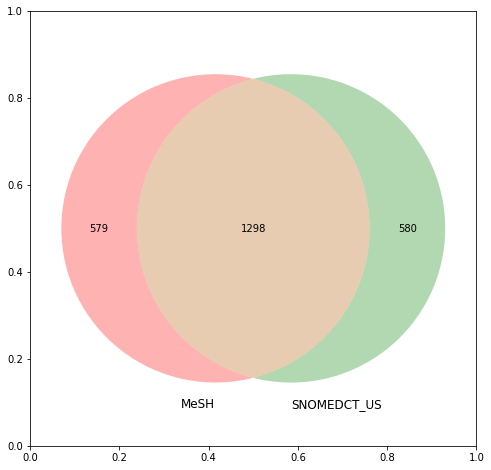

In [139]:
plt.subplots(figsize=(8,8))
ax = plt.axes()
#ax.set_facecolor("white")
plt.axis('off')
venn2(subsets= [cui_mesh, cui_snomed], set_labels=["MeSH", "SNOMEDCT_US"], alpha= 0.3)
plt.show()

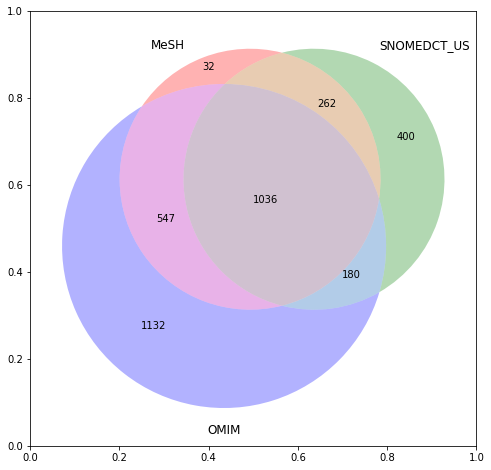

In [143]:
plt.subplots(figsize=(8,8))
ax = plt.axes()
#ax.set_facecolor("white")
ax.axis('off')
venn3(subsets= [cui_mesh, cui_snomed, cui_omim], set_labels=["MeSH", "SNOMEDCT_US", "OMIM"], alpha= 0.3)
plt.show()

In [6]:
disease_has_synonyms.cross_name.value_counts()[:10]

SNOMEDCT_US    15051
MSH            11436
OMIM           10893
NCI             6991
CHV             5346
RCD             4220
MEDCIN          3820
MDR             3267
SNMI            2527
HPO             2426
Name: cross_name, dtype: int64

In [7]:
#disease_has_synonyms[disease_has_synonyms.cross_name == 'SNOMEDCT_US'].rename(columns= {'code': 'ui'})

### Concept Unique Identifiers (CUI)  
A concept is a meaning. A meaning can have many different names. A key goal of Metathesaurus construction is to understand the intended meaning of each name in each source vocabulary and to link all the names from all of the source vocabularies that mean the same thing (the synonyms). CUI contain the letter C followed by seven numbers.

In [8]:
# Get only Mesh entries
disphase_mesh = disease_has_synonyms[disease_has_synonyms.cross_name == 'MSH'].rename(columns= {'code': 'ui'})
# cui: is the UMLS concept identifier (CUI)
disphase_mesh

,cui,name,ui,cross_name
45380,C0000772,"Abnormalities, Multiple",D000015,MSH
45381,C0000772,Multiple Abnormalities,D000015,MSH
45382,C0000772,MULTIPLE ABNORM,D000015,MSH
45383,C0000772,ABNORM MULTIPLE,D000015,MSH
45384,C0000889,Acanthosis Nigricans,D000052,MSH
...,...,...,...,...
56811,C4759774,"Scapuloperoneal Myopathy, MYH7 Related",D020389,MSH
56812,C4759774,MYH7-Related Scapuloperoneal Myopathy,D020389,MSH
56813,C4759774,"Myopathy, MYH7-Related Scapuloperoneal",D020389,MSH
56814,C4759774,Scapuloperoneal Muscular Dystrophy,D020389,MSH


In [9]:
# Add data from Mesh ontology
disphase_mesh = disphase_mesh.merge(mesh_df, how= 'left').drop(columns= ['cross_name'])
disphase_mesh

,cui,name,ui,mesh_name,tree
0,C0000772,"Abnormalities, Multiple",D000015,"Abnormalities, Multiple",C16.131.077
1,C0000772,Multiple Abnormalities,D000015,"Abnormalities, Multiple",C16.131.077
2,C0000772,MULTIPLE ABNORM,D000015,"Abnormalities, Multiple",C16.131.077
3,C0000772,ABNORM MULTIPLE,D000015,"Abnormalities, Multiple",C16.131.077
4,C0000889,Acanthosis Nigricans,D000052,Acanthosis Nigricans,C17.800.621.430.530.100
...,...,...,...,...,...
11431,C4759774,"Scapuloperoneal Myopathy, MYH7 Related",D020389,"Muscular Dystrophy, Emery-Dreifuss","C05.651.534.500.350,C10.668.491.175.500.350,C1..."
11432,C4759774,MYH7-Related Scapuloperoneal Myopathy,D020389,"Muscular Dystrophy, Emery-Dreifuss","C05.651.534.500.350,C10.668.491.175.500.350,C1..."
11433,C4759774,"Myopathy, MYH7-Related Scapuloperoneal",D020389,"Muscular Dystrophy, Emery-Dreifuss","C05.651.534.500.350,C10.668.491.175.500.350,C1..."
11434,C4759774,Scapuloperoneal Muscular Dystrophy,D020389,"Muscular Dystrophy, Emery-Dreifuss","C05.651.534.500.350,C10.668.491.175.500.350,C1..."


In [10]:
# Separate different trees for the same disease
disphase_mesh.tree = disphase_mesh.tree.str.split(",")
disphase_mesh = disphase_mesh.explode("tree")
disphase_mesh.shape

(33356, 5)

In [11]:
disphase_mesh.sample(20)

,cui,name,ui,mesh_name,tree
2961,C0027430,"Polyp, Nasal",D009298,Nasal Polyps,C09.603.557
521,C0007120,"Adenocarcinomas, Bronchiolo-Alveolar",D002282,"Adenocarcinoma, Bronchiolo-Alveolar",C04.588.894.797.520.055.500
4646,C0162534,"Encephalopathies, Transmissible Spongiform",D017096,Prion Diseases,C10.228.228.800
3033,C0027831,Recklinghausen's Disease of Nerve,D009456,Neurofibromatosis 1,C16.320.700.633.650
347,C0004138,Inherited Spinocerebellar Degeneration,D013132,Spinocerebellar Degenerations,C16.320.400.780
113,C0002395,Alzheimer Type Dementia,D000544,Alzheimer Disease,C10.574.945.249
3972,C0040028,Primary Thrombocytoses,D013920,"Thrombocythemia, Essential",C15.378.100.832
120,C0002395,Alzheimer Dementia,D000544,Alzheimer Disease,F03.615.400.100
1944,C0020217,"Pregnancy, Molar",D006828,Hydatidiform Mole,C13.703.720.949.416.875
7042,C0410190,"Muscular Dystrophy, Emery-Dreifuss, Autosomal ...",D000083144,Autosomal Emery-Dreifuss Muscular Dystrophy,C05.651.534.500.350.250


In [12]:
re.findall("^C\d+", "C20.683.515.528.582.100")

['C20']

In [14]:
disphase_mesh.tree = disphase_mesh.tree.str.split(".")
disphase_mesh.tree.head()

0                   [C16, 131, 077]
1                   [C16, 131, 077]
2                   [C16, 131, 077]
3                   [C16, 131, 077]
4    [C17, 800, 621, 430, 530, 100]
Name: tree, dtype: object

In [15]:
# Keep first node and delete C letter (C is disease category in MeSH)
disphase_mesh["node"] = disphase_mesh.tree.str[0]#.str.strip("C")

In [16]:
disphase_mesh.node.value_counts()

C16    6232
C10    5324
C04    4627
C18    2408
C15    1753
C05    1316
C06    1216
C14    1185
C17    1016
C20     809
C19     756
C23     754
C13     628
C11     592
C12     559
F03     312
C08     301
C07     167
C09     159
C01     154
F01      38
C26      24
A10      12
C25       9
A15       8
G08       4
G07       3
E01       3
A05       2
G11       1
Name: node, dtype: int64

In [61]:
disphase_mesh

,cui,name,ui,mesh_name,tree,node
0,C0000772,"Abnormalities, Multiple",D000015,"Abnormalities, Multiple","[C16, 131, 077]",C16
1,C0000772,Multiple Abnormalities,D000015,"Abnormalities, Multiple","[C16, 131, 077]",C16
2,C0000772,MULTIPLE ABNORM,D000015,"Abnormalities, Multiple","[C16, 131, 077]",C16
3,C0000772,ABNORM MULTIPLE,D000015,"Abnormalities, Multiple","[C16, 131, 077]",C16
4,C0000889,Acanthosis Nigricans,D000052,Acanthosis Nigricans,"[C17, 800, 621, 430, 530, 100]",C17
...,...,...,...,...,...,...
11434,C4759774,Scapuloperoneal Muscular Dystrophy,D020389,"Muscular Dystrophy, Emery-Dreifuss","[C16, 320, 577, 350]",C16
11435,C4759774,"Muscular Dystrophy, Scapuloperoneal",D020389,"Muscular Dystrophy, Emery-Dreifuss","[C05, 651, 534, 500, 350]",C05
11435,C4759774,"Muscular Dystrophy, Scapuloperoneal",D020389,"Muscular Dystrophy, Emery-Dreifuss","[C10, 668, 491, 175, 500, 350]",C10
11435,C4759774,"Muscular Dystrophy, Scapuloperoneal",D020389,"Muscular Dystrophy, Emery-Dreifuss","[C16, 320, 322, 625]",C16


In [63]:
# MeSH tree
tree = pd.read_csv('../raw_data/mtrees2022.bin', sep = ";", header=None, names= ["term", "tree"])

In [64]:
tree.sample(10)

,term,tree
41154,Xeroderma Pigmentosum Group D Protein,D12.776.930.930.875.875.500
47495,Bone Transplantation,E04.555.130
50990,Delay Discounting,F02.463.785.373.346.700
25026,Eplerenone,D02.540.383
47925,"Fractionation, Field Flow",E05.196.155.500
25242,Mersalyl,D02.691.750.100.710
18671,Hemosiderosis,C18.452.565.500.500
39642,Ferrochelatase,D12.776.575.562
59632,Physician Payment Review Commission,N03.219.521.710.305.180
9648,Monkeypox,C01.925.256.743.615


In [65]:
# Get first tree element and the nodes of disease category
ix = [] 
for i, l in enumerate(tree.tree.str.split('.')):
    if len(l) == 1 and l[0].startswith("C"):
        ix.append(i)

In [72]:
nodes = tree.iloc[ix].rename(columns= {"tree": "node", "term": "disease_category"})

In [62]:
#nodes.tree = nodes.tree.str.strip("C")

In [73]:
nodes

,disease_category,node
8513,Infections,C01
9900,Neoplasms,C04
10955,Musculoskeletal Diseases,C05
11483,Digestive System Diseases,C06
11977,Stomatognathic Diseases,C07
12268,Respiratory Tract Diseases,C08
12650,Otorhinolaryngologic Diseases,C09
12792,Nervous System Diseases,C10
14266,Eye Diseases,C11
14622,Urogenital Diseases,C12


In [75]:
# Add disease categories
disphase_mesh = disphase_mesh.merge(nodes)

In [85]:
disphase_mesh

,cui,name,ui,mesh_name,tree,node,disease_category
0,C0000772,"Abnormalities, Multiple",D000015,"Abnormalities, Multiple","[C16, 131, 077]",C16,"Congenital, Hereditary, and Neonatal Diseases ..."
1,C0000772,Multiple Abnormalities,D000015,"Abnormalities, Multiple","[C16, 131, 077]",C16,"Congenital, Hereditary, and Neonatal Diseases ..."
2,C0000772,MULTIPLE ABNORM,D000015,"Abnormalities, Multiple","[C16, 131, 077]",C16,"Congenital, Hereditary, and Neonatal Diseases ..."
3,C0000772,ABNORM MULTIPLE,D000015,"Abnormalities, Multiple","[C16, 131, 077]",C16,"Congenital, Hereditary, and Neonatal Diseases ..."
4,C0001080,Achondroplasia,D000130,Achondroplasia,"[C16, 320, 240, 500]",C16,"Congenital, Hereditary, and Neonatal Diseases ..."
...,...,...,...,...,...,...,...
29356,C0016663,Pathologic Fracture,D005598,"Fractures, Spontaneous","[C26, 404, 374]",C26,Wounds and Injuries
29357,C0016663,FRACTURE PATHOL,D005598,"Fractures, Spontaneous","[C26, 404, 374]",C26,Wounds and Injuries
29358,C0016663,FRACTURES PATHOL,D005598,"Fractures, Spontaneous","[C26, 404, 374]",C26,Wounds and Injuries
29359,C0016663,PATHOL FRACTURES,D005598,"Fractures, Spontaneous","[C26, 404, 374]",C26,Wounds and Injuries


<AxesSubplot:>

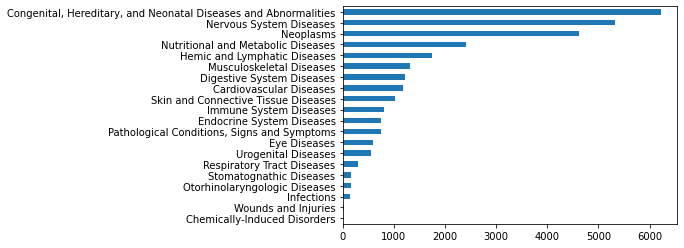

In [84]:
disphase_mesh.disease_category.value_counts(ascending=True).plot(kind='barh')

# Cuantas proteinas se encuentran asociadas a cada disease?

In [89]:
disease = pd.read_csv('../db_tables/disease.tsv', sep= '\t')
mutation_has_disease = pd.read_csv('../db_tables/mutation_has_disease.tsv', sep= '\t')

In [87]:
disease

,cui,disease_name
0,C0000772,Multiple congenital anomalies
1,C0000889,Acanthosis Nigricans
2,C0001080,Achondroplasia
3,C0001118,Acid-Base Imbalance
4,C0001125,"Acidosis, Lactic"
...,...,...
4046,C5231558,"HYPOALPHALIPOPROTEINEMIA, PRIMARY, 1"
4047,C5237034,Solid Pseudopapillary Neoplasm of the Ovary
4048,C5419874,Pancreatic Invasive Micropapillary Adenocarcinoma
4049,C5421221,Salivary Gland Small Cell Neuroendocrine Carci...


In [88]:
disease_has_synonyms

,cui,name,code,cross_name
0,C0000772,Multiple congenital anomalies,A90,ICPC
1,C0000772,Multiple cong anomalies,A90,ICPC
2,C0001973,Chronic alcohol abuse,P15,ICPC
3,C0002881,Hereditary hemolytic anemias,B78,ICPC
4,C0003811,Ectopic beats all types,K80,ICPC
...,...,...,...,...
89790,C0878684,SHORT syndrome,30068,DDB
89791,C1862322,Southeast Asian ovalocytosis,9416,DDB
89792,C1862322,Melanesian ovalocytosis,9416,DDB
89793,C1862322,Stomatocytic ovalocytosis,9416,DDB
